In [3]:
#compute simple fft

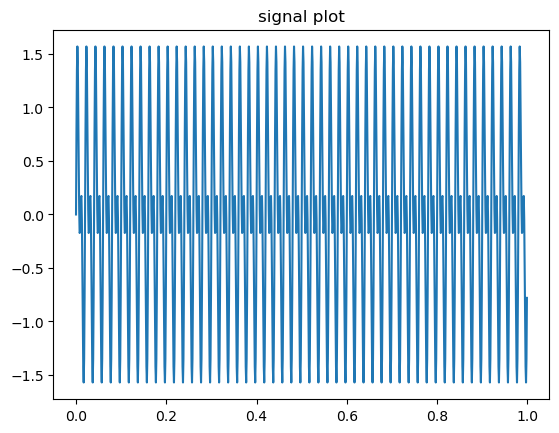

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#signal attributes
fs=1000
T=1/fs  #step size or sampling width(period)
t=np.arange(0,1,T) #time samples
f1=50
f2=100
Y=np.sin(2*np.pi*f1*t)+0.8*np.sin(2*np.pi*f2*t)
plt.plot(t,Y)
plt.title("signal plot")
plt.show()

          

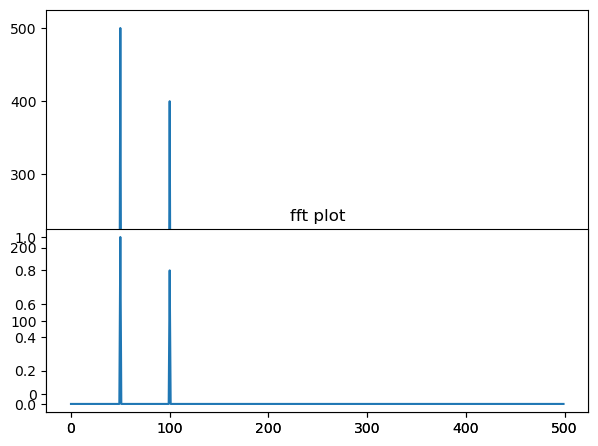

In [5]:
#converting to freq domain

Yfft=np.fft.fft(Y)
N=len(Y) #number of samples(bins)
#to get acctual frequency values apply freqz function
Freqs=np.fft.fftfreq(N,d=T)
#fft computed also has positive and equivalent negative frequencies
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]))
plt.subplot(2,1,2)
plt.title("fft plot")
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]) *2/N)
plt.tight_layout()
plt.show()

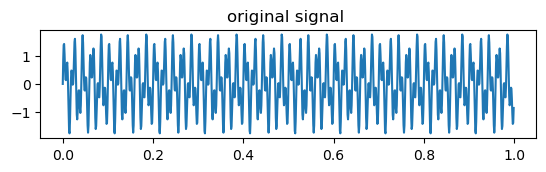

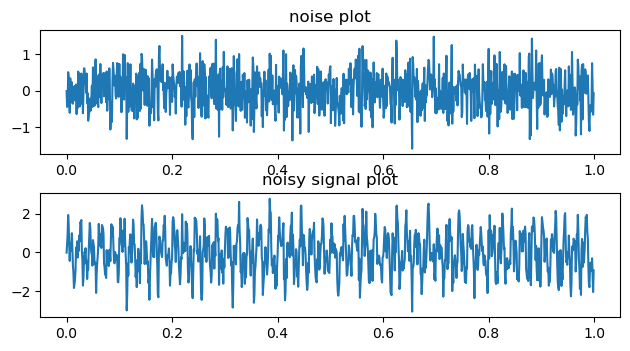

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#signal attributes
fs=1000
T=1/fs  #step size or sampling width(period)
t=np.arange(0,1,T) #time samples
f1=50
f2=120
Y=np.sin(2*np.pi*f1*t)+0.8*np.sin(2*np.pi*f2*t)
noise=np.random.normal(0,0.5,Y.shape)
Ynoisy=Y+noise
plt.subplot(3,1,1)
plt.plot(t,Y)
plt.title("original signal ")
plt.show()
plt.subplot(3,1,2)
plt.plot(t,noise)
plt.title("noise plot")
plt.tight_layout()
plt.subplot(3,1,3)
plt.plot(t,Ynoisy)
plt.title("noisy signal plot")
plt.show()


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


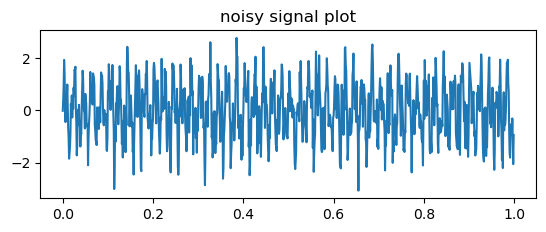

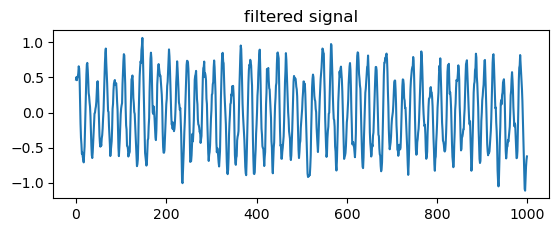

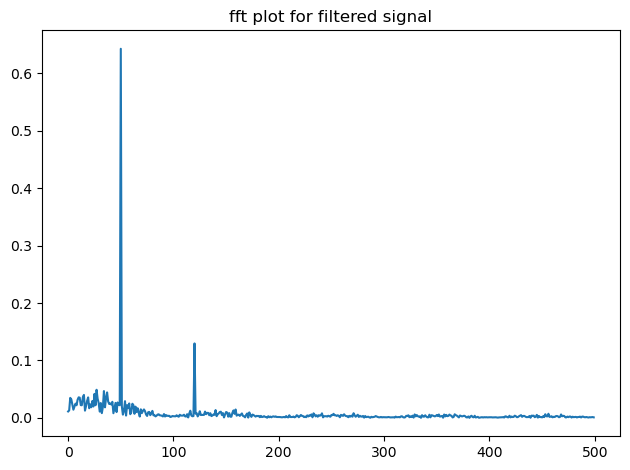

In [39]:
#filtering the noise using convolution
flter_size=10
filter_coeff=np.ones(flter_size)/flter_size
print(filter_coeff) 
conv_signal=convolve(Ynoisy,filter_coeff,mode="same")
plt.subplot(2,1,1)
plt.plot(t,Ynoisy)
plt.title("noisy signal plot")
plt.show()
#plot the output signal
plt.subplot(2,1,2)
plt.plot(np.arange(len(Ynoisy)),conv_signal)
plt.title("filtered signal")
plt.show()


Yfft=np.fft.fft(conv_signal)
N=len(conv_signal) #number of samples(bins)
#to get acctual frequency values apply freqz function
Freqs=np.fft.fftfreq(N,d=T)
#fft computed also ha"s positive and equivalent negative frequencies
plt.title("fft plot for filtered signal")
# plt.subplot(2,1,3)
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]) *2/N)
plt.tight_layout()
plt.show()

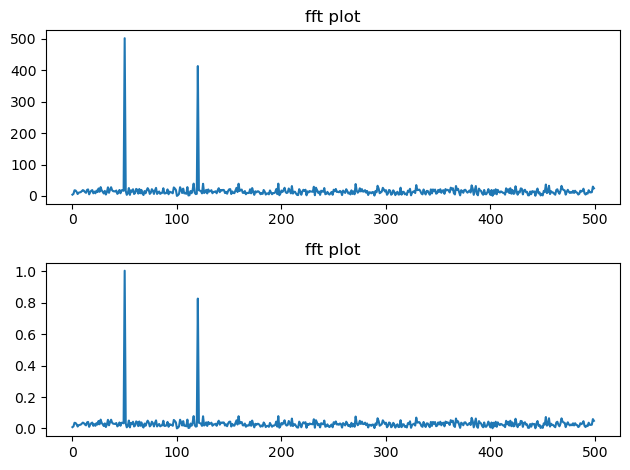

In [20]:
Yfft=np.fft.fft(Ynoisy)
N=len(Ynoisy) #number of samples(bins)
#to get acctual frequency values apply freqz function
Freqs=np.fft.fftfreq(N,d=T)
#fft computed also ha"s positive and equivalent negative frequencies
plt.subplot(2,1,1)
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]))
plt.title("fft plot")
plt.subplot(2,1,2)
plt.title("fft plot")
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]) *2/N)
plt.tight_layout()
plt.show()

CONVOLUTION FILTERING


In [ ]:
#generate signal (noisy signal)
#select the filter coefficient (average filter)
#convolve the filter coefficient with the noisy signal
#check result


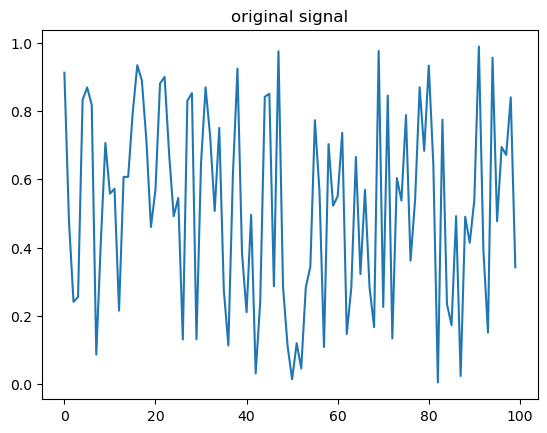

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


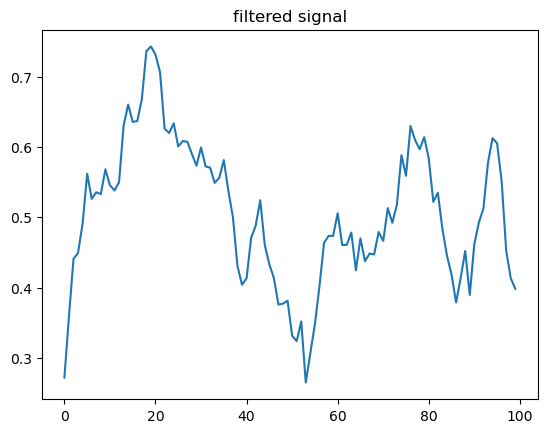

In [25]:
from scipy.signal import convolve
#generate signal
signal =np.random.rand(100)
plt.plot(np.arange(100),signal)
plt.title("original signal")
plt.show()

#generate filter coefficients
filter_size=10
filter_coeff=np.ones(filter_size)/filter_size
print(filter_coeff) 
conv_signal=convolve(signal,filter_coeff,mode="same")

#plot the output signal
plt.plot(np.arange(100),conv_signal)
plt.title("filtered signal")
plt.show()


## FIR filter and IIR filter design
 




 FIR Design using window method
-Hamming window
-Hanning window
-Blackman window etc

2. Design using ParksMccellan algorithm 
*Equiripple filter design

3. Least squares design
4. Frequency sampling method


In [44]:
#design
#N(no. of TAPS)
N=100
#filter type:lowpass,high pass ,band pass, band stop
filter_type='lowpass'
#cut off frequency
cutoff=1000 #1 khz for lowpass and high pass
cutoffs=[1000,2000] #bandpass and bandstop
#window type
window='hamming' # 'haan',blackman,kaiser,

#sampling frequency
fs=8000 #8 khz

#now we can design the filter
from scipy.signal import firwin,freqz
#firwin(no. of taps,cutoff frequency,samplig freq,window )
coeff=firwin(N,cutoff,fs=fs,window=window)
coeff


array([ 4.75285417e-04,  2.03254909e-04, -2.14649531e-04, -5.58522147e-04,
       -6.12361919e-04, -2.81859885e-04,  3.16296132e-04,  8.62553947e-04,
        9.78121596e-04,  4.60253149e-04, -5.22950390e-04, -1.43313491e-03,
       -1.62398309e-03, -7.60533186e-04,  8.57652701e-04,  2.32857207e-03,
        2.61142311e-03,  1.20971773e-03, -1.34926033e-03, -3.62379822e-03,
       -4.02162414e-03, -1.84451067e-03,  2.03814073e-03,  5.42682104e-03,
        5.97521366e-03,  2.72114739e-03, -2.98807538e-03, -7.91363656e-03,
       -8.67491160e-03, -3.93710626e-03,  4.31312886e-03,  1.14091232e-02,
        1.25072704e-02,  5.68461160e-03, -6.24628708e-03, -1.66021017e-02,
       -1.83254121e-02, -8.40684328e-03,  9.35123883e-03,  2.52514779e-02,
        2.84452792e-02,  1.33947464e-02, -1.54112144e-02, -4.34975634e-02,
       -5.19862879e-02, -2.65651853e-02,  3.44103822e-02,  1.16953443e-01,
        1.95646868e-01,  2.43569790e-01,  2.43569790e-01,  1.95646868e-01,
        1.16953443e-01,  

## APPLYING THE CREATED COEFFICIENTS TO THE NOISY SIGNAL AND CONVERTING TO FREQUENCY DOMAIN


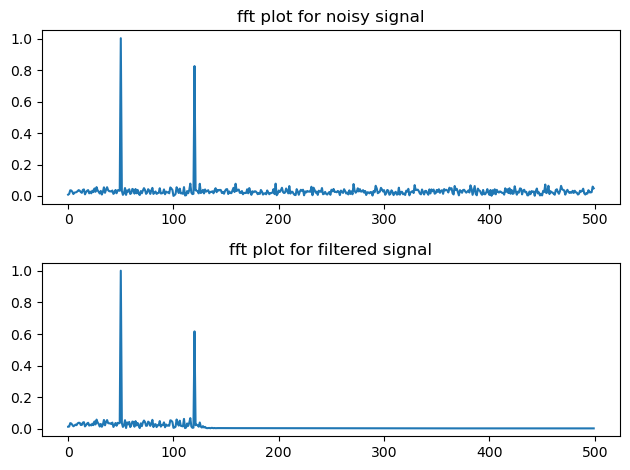

In [ ]:
#design
#N(no. of TAPS)
N=100
#filter type:lowpass,high pass ,band pass, band stop
filter_type='highpass'
#cut off frequency
cutoff=1000 #1 khz for lowpass and high pass
cutoffs=[1000,2000] #bandpass and bandstop
#window type
window='hamming' # 'haan',blackman,kaiser,

#sampling frequency
fs=8000 #8 khz

#now we can design the filter
from scipy.signal import firwin,freqz
#firwin(no. of taps,cutoff frequency,samplig freq,window )
coeff=firwin(N,cutoff,fs=fs,window=window)

Yfft=np.fft.fft(Ynoisy)
N=len(Ynoisy) #number of samples(bins)
#to get acctual frequency values apply freqz function
Freqs=np.fft.fftfreq(N,d=T)
#fft computed also ha"s positive and equivalent negative frequencies

plt.subplot(2,1,1)
plt.title("fft plot for noisy signal")
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]) *2/N)


Yfft=np.fft.fft(conv_signal)
N=len(conv_signal) #number of samples(bins)
#to get acctual frequency values apply freqz function
Freqs=np.fft.fftfreq(N,d=T)
#fft computed also ha"s positive and equivalent negative frequencies

plt.subplot(2,1,2)
plt.title("fft plot for filtered signal")
plt.plot(Freqs[:N//2],np.abs(Yfft[:N//2]) *2/N)
plt.tight_layout()
plt.show()


## IIR Infinite impulse response filter
-these filters have feedback system along with memory
-because of the feedback higher chance of system becoming unstable
-but they take less no of coefficient (order) to achive same goal compared
-to fir filters which need more no of coefficients 
-as they take less no of coefficients implementation has computational 

IIR design
1. filter type
2. order N=4,5...
3. cutoff, cutoffs
4. passband ripple allowed ,Rp
5. stopband ripple Rs,stop band attenuation
6. design type, butterworth,cheby1,cheby2,ellip


In [ ]:
#design
#N(no. of TAPS)
N=4
#filter type:lowpass,high pass ,band pass, band stop
filter_type='highpass'
#cut off frequency
cutoff=140 #1 khz for lowpass and high pass
#sampling frequency Fs
fs=1000
rp=1 #passband ripple allowed
rs=40#stopband ripple allowed
#now we can design the filter butterworth
b,a=butter(N,cutoff,fs=fs)
#cheby1
b1,a1=cheby1(N,rp,cutoff,fs=fs)
